In [1]:
!pip uninstall -y tensorflow tensorflow-addons keras
!pip install tensorflow==2.11.0 keras==2.11.0 tensorflow-addons==0.19.0

Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: keras 3.3.3
Uninstalling keras-3.3.3:
  Successfully uninstalled keras-3.3.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 76.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 73.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 31.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
   

In [2]:
import tensorflow as tf
print(f'Tensorflow V{tf.__version__}')
print(f'Keras V{tf.keras.__version__}')

Tensorflow V2.11.0
Keras V2.11.0


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [4]:
data = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv')

In [5]:
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values

In [6]:
y = data['label'].values

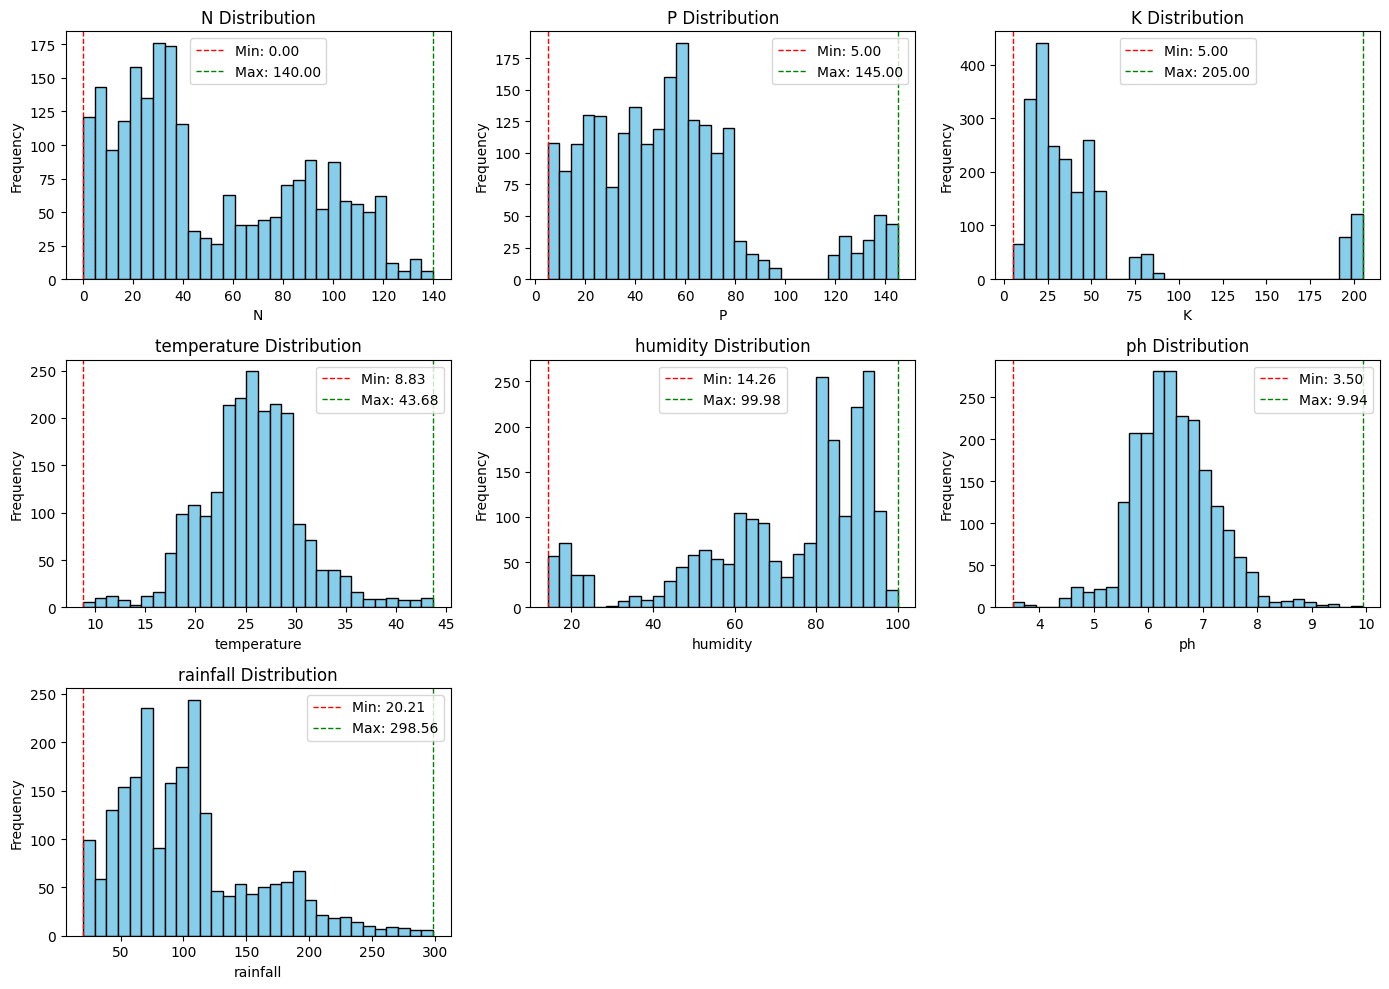

In [9]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create a figure with subplots
plt.figure(figsize=(14, 10))

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)  # Adjust the grid size based on the number of features
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    # Calculate and display min and max values
    min_value = data[feature].min()
    max_value = data[feature].max()
    plt.axvline(min_value, color='red', linestyle='dashed', linewidth=1, label=f'Min: {min_value:.2f}')
    plt.axvline(max_value, color='green', linestyle='dashed', linewidth=1, label=f'Max: {max_value:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

In [10]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
model = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_one_hot.shape[1], activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 22)                1

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [18]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
44/44 [==============================] - 2s 9ms/step - loss: 2.7676 - accuracy: 0.1911 - val_loss: 2.2287 - val_accuracy: 0.4432 - lr: 0.0010
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 1.8169 - accuracy: 0.4588 - val_loss: 1.0660 - val_accuracy: 0.7244 - lr: 0.0010
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 1.0983 - accuracy: 0.6378 - val_loss: 0.5820 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.8009 - accuracy: 0.7202 - val_loss: 0.4074 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.6264 - accuracy: 0.7827 - val_loss: 0.3360 - val_accuracy: 0.8949 - lr: 0.0010
Epoch 6/100
44/44 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.8232 - val_loss: 0.2971 - val_accuracy: 0.8807 - lr: 0.0010
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.4

In [19]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

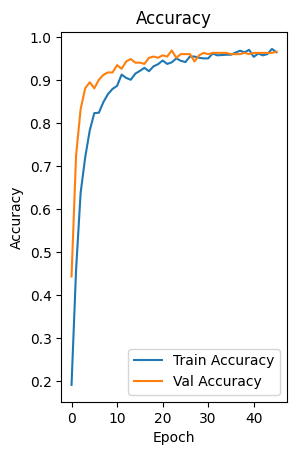

In [20]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

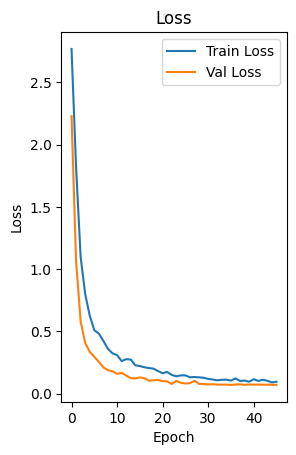

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

14/14 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9614
Test accuracy: 0.9614


In [23]:
model.save('crop_recommendation_model.h5')
print("Model saved successfully.")


Model saved successfully.


In [24]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('crop_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)
print("TFLite model saved successfully.")

TFLite model saved successfully.


In [6]:
labels_list = data['label'].unique().tolist()
print(labels_list)

['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [30]:
def predict_crop():
    print("Enter the following values for prediction:")
    N = float(input("N (Nitrogen content in soil - kg/ha): "))
    P = float(input("P (Phosphorous content in soil - kg/ha): "))
    K = float(input("K (Potassium content in soil - kg/ha): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value of the soil: "))
    rainfall = float(input("Rainfall (mm): "))

    # Combine inputs into a single array
    user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Scale the input data
    user_input_scaled = scaler.transform(user_input)

    # Predict the crop type
    prediction = model.predict(user_input_scaled)
    predicted_class = np.argmax(prediction, axis=1)

    # Decode the predicted label
    predicted_crop = label_encoder.inverse_transform(predicted_class)
    print(f'Recommended crop: {predicted_crop[0]}')

# Run the prediction
predict_crop()

Enter the following values for prediction:


N (Nitrogen content in soil - kg/ha):  90
P (Phosphorous content in soil - kg/ha):  42
K (Potassium content in soil - kg/ha):  43
Temperature (°C):  20.8
Humidity (%):  82
pH value of the soil:  6.5
Rainfall (mm):  203


1/1 [==============================] - 0s 106ms/step
Recommended crop: rice


In [31]:
import joblib

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Load the scaler before making predictions
scaler = joblib.load('scaler.pkl')


In [32]:
# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Load the label encoder
label_encoder = joblib.load('label_encoder.pkl')


In [33]:
import joblib

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path='/kaggle/working/crop_recommendation_model.tflite')
interpreter.allocate_tensors()

# Load the scaler used during training
scaler = joblib.load('/kaggle/working/scaler.pkl')

# Load the LabelEncoder used during training
label_encoder = joblib.load('/kaggle/working/label_encoder.pkl')

def predict_crop():
    print("Enter the following values for prediction:")
    N = float(input("N (Nitrogen content in soil - kg/ha): "))
    P = float(input("P (Phosphorous content in soil - kg/ha): "))
    K = float(input("K (Potassium content in soil - kg/ha): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value of the soil: "))
    rainfall = float(input("Rainfall (mm): "))

    # Combine inputs into a single array
    user_input = np.array([[N, P, K, temperature, humidity, ph, rainfall]], dtype=np.float32)

    # Scale the input data
    user_input_scaled = scaler.transform(user_input)

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], user_input_scaled.astype(np.float32))

    # Run inference
    interpreter.invoke()

    # Get the result
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_class = np.argmax(output_data, axis=1)

    # Decode the predicted label
    predicted_crop = label_encoder.inverse_transform(predicted_class)
    print(f'Recommended crop: {predicted_crop[0]}')

# Run the prediction
predict_crop()


Enter the following values for prediction:


N (Nitrogen content in soil - kg/ha):  111
P (Phosphorous content in soil - kg/ha):  5
K (Potassium content in soil - kg/ha):  47
Temperature (°C):  28
Humidity (%):  91
pH value of the soil:  6.2
Rainfall (mm):  21


Recommended crop: muskmelon
